<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/kNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.2.2 농구선수의 게임 데이터를 활용한 포지션 예측

###문제 정의
NBA 농구선수들의 게임 기록을 데이터로 사용해서 특정 농구선수의 포지션 **예측**

###데이터 획득
- 2017 NBA 농구선수의 실제 데이터
- 2017년도 NBA 선수 게임 통계에서 수집

In [1]:
import pandas as pd

In [2]:
# 데이터 수집
df = pd.read_csv("/content/basketball_stat.csv")

In [3]:
# 수집된 데이터 샘플 확인
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


데이터 설명
- Player : 선수 이름
- Pos : 포지션
- 3P : 한 경기 평균 3점슛 성공 횟수
- 2P : 한 경기 평균 2점슛 성공 횟수
- TRB : 한 경기 평균 리바운드 성공 횟수
- AST : 한 경기 평균 어시스트 성공 횟수
- STL : 한 경기 평균 스틸 성공 횟수
- BLK : 한 경기 평균 블로킹 성공 횟수

실습 목표 - 임의의 농구선수의 포지션 예측

In [4]:
# 현재 데이터에서 포지션의 개수 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

C - 센터 / 골대, 포스트 근처에서 슛을 블로킹하고, 리바운드하며, 공을 바깥으로 빼줘서 공격 찬스를 만들기도 하며, 골대 근처에서 2점슛으로 득점하기도 함

SG - 슈팅가드 / 코트 내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할


### 데이터 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL and 2P in 2d place')

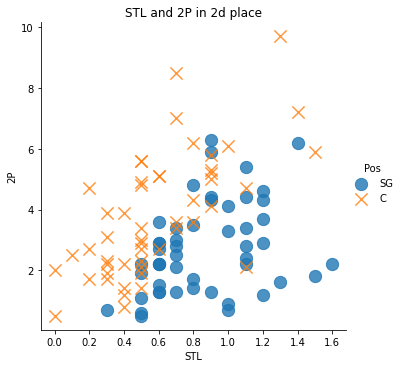

In [16]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot("STL", "2P", data = df, fit_reg = False, # x축, y축, data, noline
           scatter_kws = {"s" : 150}, # 좌표상의 점의 크기
           markers = ['o','x'],
           hue = "Pos")  # 예측값

# 타이틀
plt.title("STL and 2P in 2d place")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2P in 2d place')

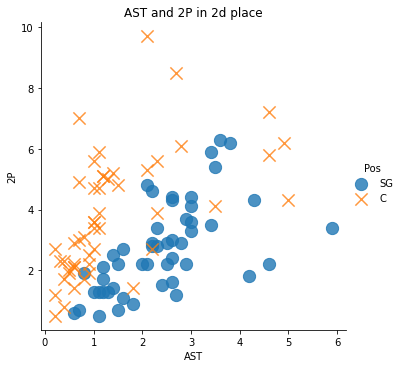

In [18]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot("AST", "2P", data = df, fit_reg = False, # x축, y축, data, noline
           scatter_kws = {"s" : 150}, # 좌표상의 점의 크기
           markers = ['o','x'],
           hue = "Pos")  # 예측값

# 타이틀
plt.title("AST and 2P in 2d place")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK and 3P in 2d place')

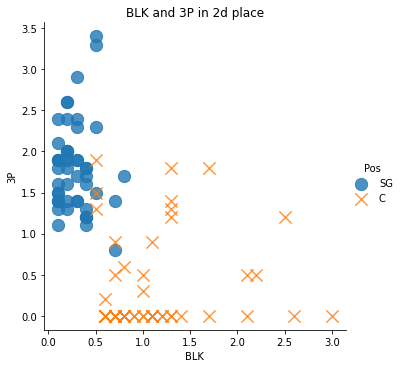

In [20]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot("BLK", "3P", data = df, fit_reg = False, # x축, y축, data, noline
           scatter_kws = {"s" : 150}, # 좌표상의 점의 크기
           markers = ['o','x'],
           hue = "Pos")  # 예측값

# 타이틀
plt.title("BLK and 3P in 2d place")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB and 3P in 2d place')

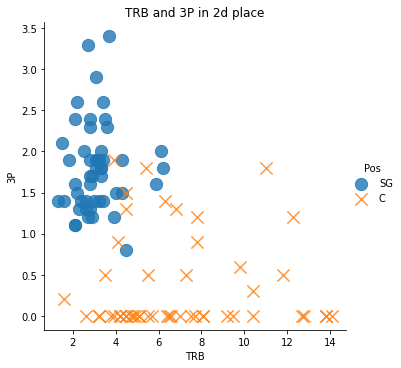

In [21]:
# TRB, 3점슛 데이터 시각화
sns.lmplot("TRB", "3P", data = df, fit_reg = False, # x축, y축, data, noline
           scatter_kws = {"s" : 150}, # 좌표상의 점의 크기
           markers = ['o','x'],
           hue = "Pos")  # 예측값

# 타이틀
plt.title("TRB and 3P in 2d place")